In [1]:
from helpers import * 

from four_complete import *
from four_complete_locations import *
from graph_checks import *

from canonical_order import *

from canonical_order_kant import *
from four_complete_edges_archive import *

In [2]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

graph_data = side_data

In [3]:
f = FourComplete(graph_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

b = BoundaryCycle(copy.deepcopy(graph_data))
locs = FourCompleteLocations(copy.deepcopy(graph_data), f.boundary, f.paths, b.boundary_line_string)
locs.run()

ic| o: 1, direction: <CardinalDirections.SOUTH: 0>, ix: 10
ic| o: 2, direction: <CardinalDirections.WEST: 1>, ix: 11
ic| o: 3, direction: <CardinalDirections.NORTH: 2>, ix: 12
ic| o: 0, direction: <CardinalDirections.EAST: 3>, ix: 9


In [4]:
fe=FourCompleteEdgesArchive(GraphData(locs.G, locs.embed), b.boundary_line_string )
fe.run()

ic| edge: (4, 10)
ic| rad: 0.900106010701443


None
None


## experimenting

In [5]:
bx, by = points_to_plot(fe.temp_buffer.boundary.coords)

In [6]:
fe.prepare_to_plot()
d = fe.plotting_data
d.keys()

dict_keys(['buffer', 'vec1', 'vec2'])

In [7]:
d["vec1"]

PointsList({'x': [-0.9334042863332108, -0.4482758620689655], 'y': [-1.0414248499124175, 0.18965517241379315]})

In [8]:
fe.proj_point.coords.xy

(array('d', [-0.9334042863332108]), array('d', [-1.0414248499124175]))

In [9]:
fe.embed[4]

array([-0.44827586,  0.18965517])

In [10]:
fe.curve

In [11]:
from matplotlib.patches import Arc

In [12]:
arc = Arc(xy=(0,0), width=1, height=1, angle=0, theta1=0, theta2=90)

In [13]:
verts = arc.get_path().vertices
xx, yy  = verts.T

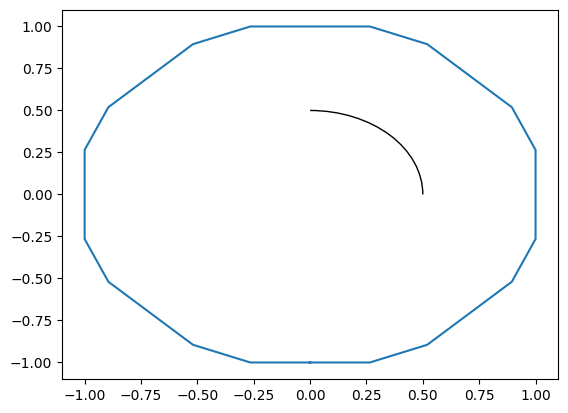

In [14]:
fig = plt.figure()

ax = plt.axes()

ax.add_patch(arc)

ax.plot(xx, yy)

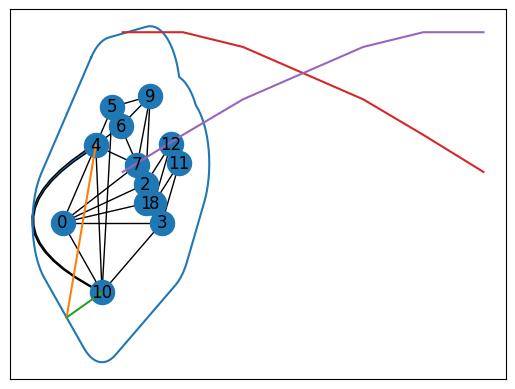

In [15]:
fig = plt.figure()

ax = plt.axes()


nx.draw_networkx(locs.G, locs.embed, ax=ax)
ax.plot(d["buffer"].x, d["buffer"].y)
ax.plot(d["vec1"].x, d["vec1"].y)
ax.plot(d["vec2"].x, d["vec2"].y)
ax.add_patch(fe.curve)
# ax.add_patch(arc)

ax.plot(arc.get_path().vertices)


# plt.plot(fe.curve)

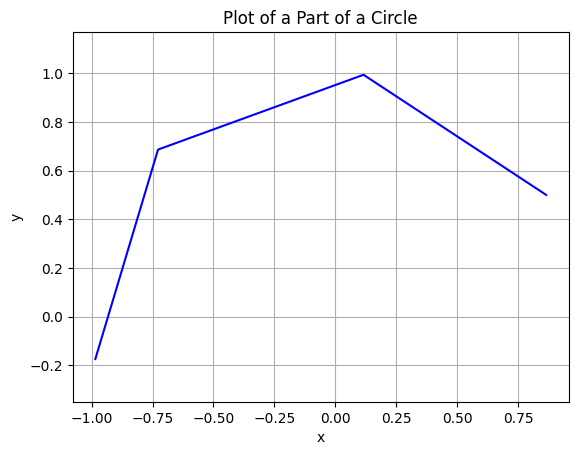

In [16]:
## GET ARC 
# Center coordinates of the circle
h = 0
k = 0

# Radius of the circle
r = 1

# Define the range of angles in degrees
start_angle = 30  # Start angle in degrees
end_angle = 190   # End angle in degrees

# Convert angles to radians
theta_start = np.deg2rad(start_angle)
theta_end = np.deg2rad(end_angle)

# Generate values for theta within the specified range
theta = np.linspace(theta_start, theta_end, 4)

# Calculate corresponding x and y values using parametric equations
x = h + r * np.cos(theta)
y = k + r * np.sin(theta)

# Plot the part of the circle
plt.plot(x, y, color='b')

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a title
plt.title('Plot of a Part of a Circle')

# Show the plot
plt.grid()
plt.show()